#### Solving the Non-chemical equilibrium and kinetic equilibrium
The Boltzmann equation:
$$
\frac{\partial{f}}{\partial{t}} - pH \frac{\partial{f}}{\partial p} = C_{\textrm{ann}}[f]
$$

In [1]:
import numpy as np
import matplotlib as plt

import scipy.integrate as sc

def dydx():
    return 

#### Non-chemical equilibrium and non-kinetic equilibrium
The Boltzmann equation:
$$
\frac{\partial{f}}{\partial{t}} - pH \frac{\partial{f}}{\partial p} = C_{\textrm{ann}}[f] + C_{\textrm{scatter}}[f]
$$

In [2]:
def integrate(ys, xmin, xmax):
    """
    Implementation of Simpson's method to solve 1-dimensional integrals
    """
    # Requirement: Number of interals is odd
    N = len(ys) - 1

    if N % 2 == 0:
        print("Number of steps must be odd and (N-1)/2 must be even")
        sys.exit()
    
    dx = (xmax - xmin) / N

    area = ys[0] + ys[-1] + sum([2 * ys[n] if n % 2 == 0 else 4 * ys[n] for n in range(1,N)])

    return (dx / 3.0) * area


## Test
# area = integrate([np.sin(x * np.pi/11) for x in range(0,11)],0,np.pi)
# print(area)

In [3]:
## Various functions that we need to integrate the right-hand side of the Boltzmann equation

def E(p):
    m = 1
    return np.sqrt(p*p+m*m)


def F1(fp,fq,p,q,T):
    return -fp * fq + np.exp(-(E(p)+E(q))/T)

def F2(fp,fq,p,q):
    return -fp + fq * np.exp(-E(p)-E(q))

def I(fp1,fp2,p1,p2,T):
    G = 1
    return 0.5 * G * G * F1(fp1,fp2,p1,p2,T)

def H(fp1,fp3,p1,p3):
    G = 1
    # return G * G * 2 /(p1 * p3) (np.exp(-(p1+p3)/2))
    return G * G * 2 /(p1 * p3) * (np.exp(-abs(p1-p3)/2)-np.exp(-(p1+p3)/2)) * F2(fp1,fp3,p1,p3) 

#### Annihilation and scattering operators
$$
C_{\textrm{ann}}[f] = \frac{1}{(2\pi)^3}\frac{1}{2E(p1)}\int_{p_{\textrm{min}}}^{p_{\textrm{max}}} \frac{p_2^2\textrm{d}p_2}{2E(p_2)}IF(p_1,p_2)\\\\
C_{\textrm{scatter}}[f] = \frac{1}{(2\pi)^3}\frac{1}{2E(p1)}\int_{p_{\textrm{min}}}^{p_{\textrm{max}}} \frac{p_3^2\textrm{d}p_3}{2E(p_3)}HF(p_1,p_3)
$$

In [4]:
def C_ann(p, qs, fp, fqs, pmin, pmax,t) -> float:
    """
    1D collision operator for annihilation
    """

    T = 1/np.sqrt(t)
    y = []

    for i in range(len(qs)):
        integrand = qs[i] * qs[i] / (2 * E(qs[i])) * I(fp,fqs[i],p,qs[i],T) * F1(fp,fqs[i],p,qs[i],T)
        y.append(integrand)
    
    return 1/ (2 * np.pi)**2 * 1/(2 * E(p)) * integrate(y,pmin,pmax)

def C_scatter(p, qs, fp, fqs, pmin, pmax) -> float:
    """
    1D collision operator for elastic scattering
    """
    
    y = []

    for i in range(len(qs)):
        integrand = qs[i] * qs[i] / (2 * E(qs[i])) * H(fp,fqs[i],p,qs[i]) * F2(fp,fqs[i],p,qs[i])
        y.append(integrand)
    
    return 1/ (2 * np.pi)**2 * 1/(2 * E(p)) * integrate(y,pmin,pmax)


#### Summary
In the above sections, we have created a code that can compute the collision integrals. 
#### Finite Element Method
Next, we must solve the left-hand side of the PDE

In [18]:
import numpy as np

def Hubble(t):
    """
    Description: The Hubble Paramter
    """
    return 1/(t)

def dist_eq(p,t):
    T = 1/np.sqrt(t)
    return np.exp(-E(p)/T)





def solve(ts:list,ps:list) -> list:
    """
    Description: Numerical solver of the Boltzmann equation.

    parameters: Grid/2-dimensional list of time x momenta intervals
    
    Return: list of distribution function values for time x momenta grid.
    """
    # Defining the grid with shape len(ps) x len(ts)
    grid = np.zeros(shape=(len(ps),len(ts)))

    for i in range(len(ps)):
        grid[i][0] = dist_eq(ps[i],ts[0])

    for i in range(len(ts)-1):

        dt = ts[i+1] - ts[i] # time step
        dp = abs(ps[2] - ps[1]) # All momenta time steps are uniform

        for j in range(len(ps)):

            f = grid[j][i]
            p = ps[j]
            if j < len(ps) - 1:
                df_dp = (grid[j+1][i] - f) / dp
            else:
                df_dp = (f - grid[j-1][i]) / dp  
            H_t = Hubble(ts[i])

            fps = [grid[k][i] for k in range(len(ps))]

            I1 = C_ann(p,ps,f,fps,ps[0],ps[-1],ts[i])
            I2 = C_scatter(p,ps,f,fps,ps[0],ps[-1])

            f_new = f + dt * (p * H_t * df_dp + I1 + I2)

            grid[j][i+1] = f_new
        
    return grid


/tmp/ipykernel_16227/464548510.py:10: RuntimeWarning: overflow encountered in scalar multiply
  integrand = qs[i] * qs[i] / (2 * E(qs[i])) * I(fp,fqs[i],p,qs[i],T) * F1(fp,fqs[i],p,qs[i],T)
/tmp/ipykernel_16227/1150143191.py:14: RuntimeWarning: overflow encountered in scalar multiply
  area = ys[0] + ys[-1] + sum([2 * ys[n] if n % 2 == 0 else 4 * ys[n] for n in range(1,N)])
/tmp/ipykernel_16227/231976126.py:41: RuntimeWarning: invalid value encountered in scalar subtract
  df_dp = (grid[j+1][i] - f) / dp
/tmp/ipykernel_16227/926980239.py:12: RuntimeWarning: invalid value encountered in scalar add
  return -fp + fq * np.exp(-E(p)-E(q))
/tmp/ipykernel_16227/231976126.py:43: RuntimeWarning: invalid value encountered in scalar subtract
  df_dp = (f - grid[j-1][i]) / dp


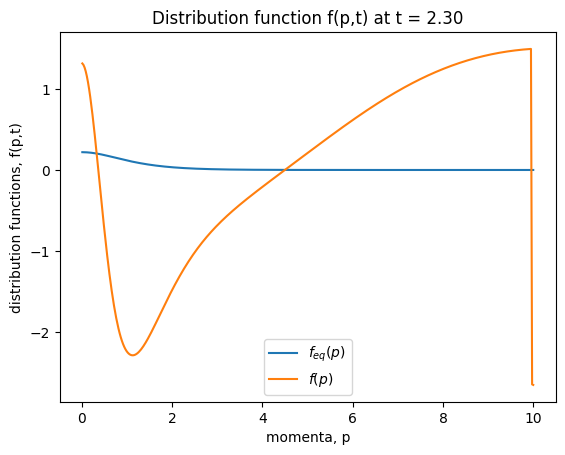

In [24]:
# Tests
import numpy as np
import matplotlib.pyplot as plt

ps = np.linspace(0.01,10,400)
ts = np.linspace(0.1,10,10)

n = 2

grid = solve(ts,ps)

fs = [grid[p][n] for p in range(len(ps))]

    

plt.xlabel("momenta, p")
plt.ylabel("distribution functions, f(p,t)")
plt.title(f"Distribution function f(p,t) at t = {ts[n]:.2f}")
plt.plot(ps,[dist_eq(ps[i],ts[n]) for i in range(len(ps))], label=r"$f_{eq}(p)$")
plt.plot(ps,[fs[i] for i in range(len(ps))], label=r"$f(p)$")
plt.legend()

In [7]:
def eps(x,y):
    """
    Dimensionless energy (Energy/Temperature)
    """
    return np.sqrt(x*x + y*y)


def F1_D(x,y1, y2, f_y1, f_y2):
    
    return -f_y1 * f_y2 + np.exp(-eps(x,y1) - eps(x,y2))


def F2_D(x,y1, y2, f_y1, f_y2):
    
    return -f_y1 + f_y2 * np.exp(-eps(x,y1)-eps(x,y2))

def I_D(x, y1, y2, f_y1, f_y2):
    G = 1 
    return G * G / 2 * F1_D(x, y1, y2, f_y1, f_y2)

def H_D(x, y1, y3, f_y1, f_y3):
    G = 1
    return G * G * 2 /(y1 * y3) * (np.exp(- abs(y1 - y3)/2) - np.exp(-(y1 + y3)/2)) * F2_D(x, y1, y3, f_y1, f_y3)



def Cann_D(lower_bound, upper_bound, steps):
    """
    Dimensionless Annihilation Operator - integrand
    """

    integrand = lambda x, y1, y2, f_y1, f_y2: y2 * y2 /(4 * eps(x,y1) * eps(x, y2)) * I_D(x, y1, y2, f_y1, f_y2) * F1_D(x, y1, y2, f_y1, f_y2)

    return 1 / (2*np.pi)**3 * integrate(integrand,lower_bound,upper_bound,steps)



def Cscatter_D(lower_bound, upper_bound, steps):
    """
    Dimensionless Scattering Operator - integrand
    """

    integrand = lambda x, y1, y3, f_y1, f_y3: y3 * y3 / (4 * eps(x, y1) * eps(x, y3)) * H_D(x, y1, y3, f_y1, f_y3) * F2_D(x, y1, y2, f_y1, f_y3)

    return 1 / (2 * np.pi)**3 * integrate(integrand, lower_bound, upper_bound, steps)



In [8]:
def collision_operators():
    
    return sum(integrals)



def rhs_func(fs,y,x,dy):
    
    df_dy = (fs[1][0] - fs[0][0])/dy

    return y/x * df_dy + y/(x * Hubble(x)) * collision_operators()



def solution(mesh) -> list:
    
    fs = []

    

    f_new = f + dt * rhs_func(fs,y,x,dy)

    return fs